# DTEK0042 Exercise 3
    Group Members:
    1. Ayesha Zafar
    2. Mishqat Maqbool
    3. Rimsha Koakab

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, filtfilt, argrelextrema

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

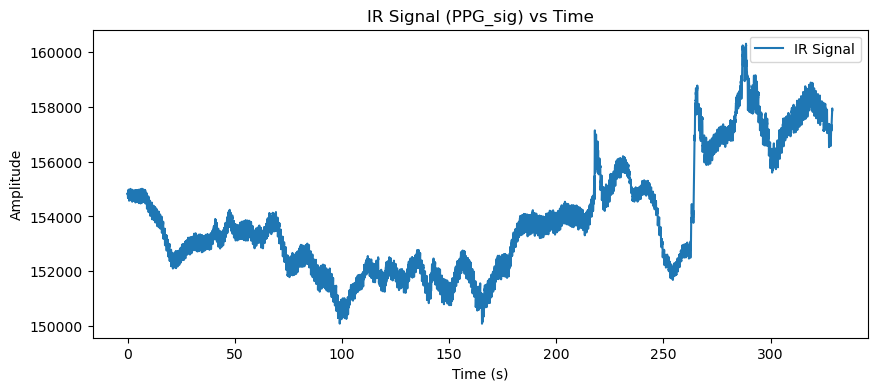

In [7]:
#code

# Loading PPG data from txt file
PPG_data = np.loadtxt('PPG_record.txt', delimiter=',')

# Extracting IR signal and storing it in variable PPG_sig
PPG_sig = PPG_data[:, 2]

# Setting sampling frequency
Fs = 132  

# Creating a time array for plotting in seconds
time_array = np.linspace(0, len(PPG_sig) / Fs, num=len(PPG_sig))

# Ploting IR signal vs time
plt.figure(figsize=(10, 4))
plt.plot(time_array, PPG_sig, label="IR Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("IR Signal (PPG_sig) vs Time")
plt.legend(loc = 'upper right')
plt.show()


# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

Dominant Frequency: 1.3


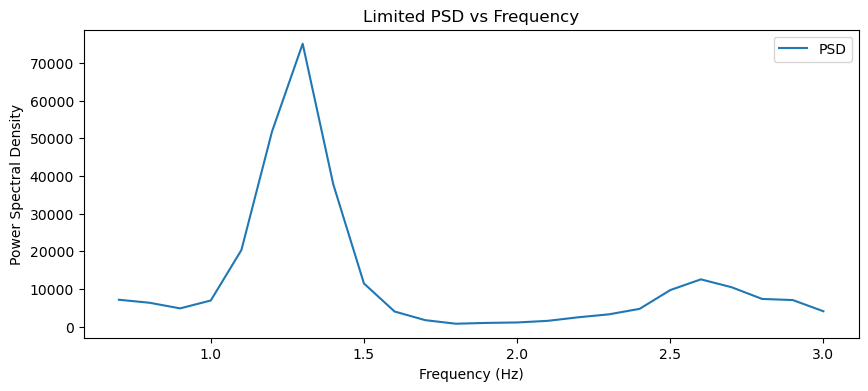

In [9]:
# code

# Setting segment length
nperseg = 10 * Fs 
PSD_freqs, PSD = welch(PPG_sig, Fs, nperseg=nperseg)

# Filtering PSD to the frequency range of 0.7 - 3 Hz
valid_range = (PSD_freqs >= 0.7) & (PSD_freqs <= 3.0)
PSD_freqs = PSD_freqs[valid_range]
PSD = PSD[valid_range]

# Dominant frequency
dominant_freq = PSD_freqs[np.argmax(PSD)]
print("Dominant Frequency:", dominant_freq)

# Ploting PSD vs frequency
plt.figure(figsize=(10, 4))
plt.plot(PSD_freqs, PSD, label="PSD")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density")
plt.title("Limited PSD vs Frequency")
plt.legend(loc = 'upper right')
plt.show()

# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

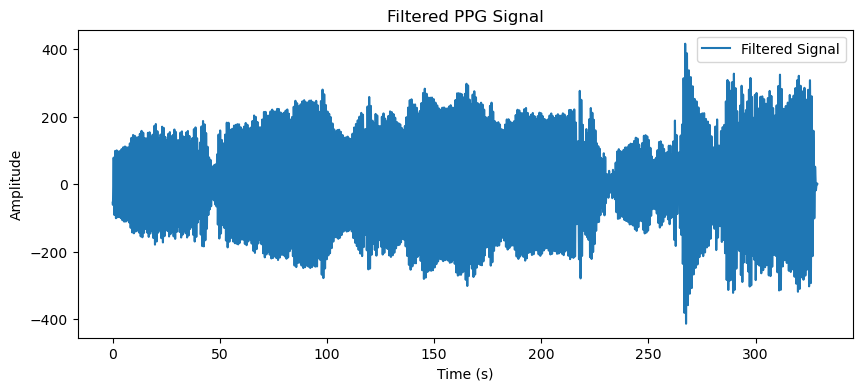

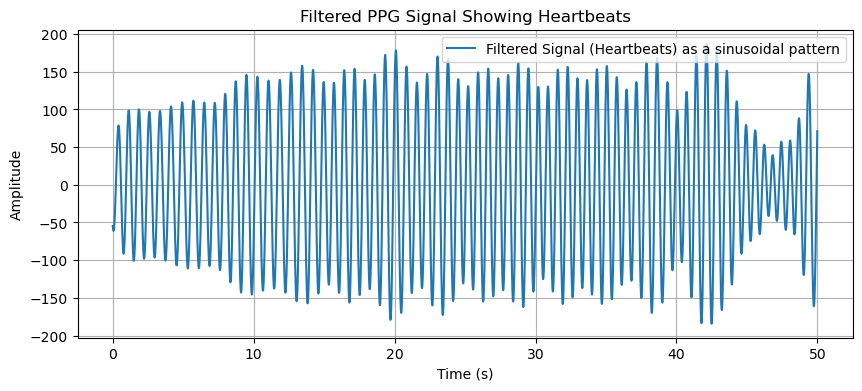

In [11]:
# code

# Setting cutoff frequencies for butterworth filter
lowcut = dominant_freq - 0.3
highcut = dominant_freq + 0.3

# Creating butterworth bandpass filter
b, a = butter(4, [lowcut / (0.5 * Fs), highcut / (0.5 * Fs)], btype='band')

# Filtering PPG_sig
filtered_PPG_sig = filtfilt(b, a, PPG_sig)

# Ploting filtered signal
plt.figure(figsize=(10, 4))
plt.plot(time_array, filtered_PPG_sig, label="Filtered Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered PPG Signal")
plt.legend(loc = 'upper right')
plt.show()

# Plotting heartbeats as a sinusoidal pattern
time_range = time_array < 50 
plt.figure(figsize=(10, 4))
plt.plot(time_array[time_range], filtered_PPG_sig[time_range], label="Filtered Signal (Heartbeats) as a sinusoidal pattern")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered PPG Signal Showing Heartbeats")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Observations:

- Butterworth bandpass filtering has helped in reducing the noise and creating a focus on the primary components related to heart rate.

- Graph shows that the amplitude fluctuates over time, with some sections showing higher intensity (around the center of the plot) while others show lower intensity (especially at the start and end). This might indicate changes in blood flow or sensor contact.

- Despite fluctuations, the filtered signal appears relatively smooth, with no abrupt spikes or irregularities. This indicates that the filtering process was effective in producing a clean signal.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

Average RR Interval (ms): 764.8336511972875
Heart Rate (bpm): 78.44843111449748


C:\Users\Ayesha\AppData\Local\Temp\ipykernel_14896\2045901613.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rx" (-> color='r'). The keyword argument will take precedence.
  plt.plot(time_array[peaks], filtered_PPG_sig[peaks], "rx", label="Peaks", color='orange')


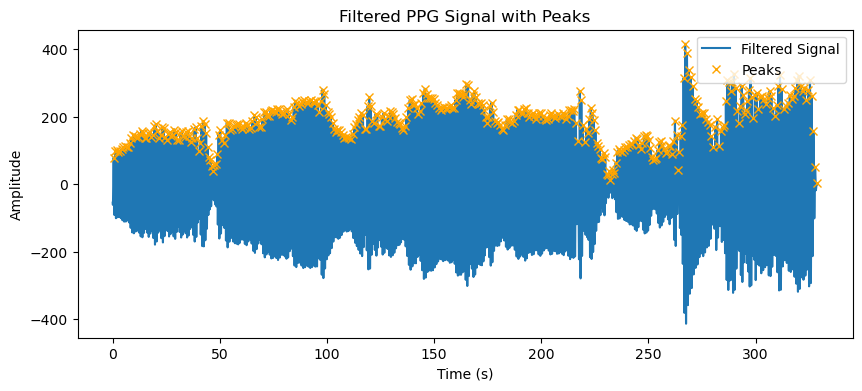

In [14]:
#code

# Finding peaks
peaks = argrelextrema(filtered_PPG_sig, np.greater)[0]

# Calculating RR intervals
RR_intervals = np.diff(peaks) / Fs * 1000 

# Finding the avg RR interval
avg_RR_interval = np.mean(RR_intervals)
HeartRate = 60.0 / (avg_RR_interval / 1000)  
# converted ms to seconds for bpm

print("Average RR Interval (ms):", avg_RR_interval)
print("Heart Rate (bpm):", HeartRate)

# Ploting filtered signal with peak locations
plt.figure(figsize=(10, 4))
plt.plot(time_array, filtered_PPG_sig, label="Filtered Signal")
plt.plot(time_array[peaks], filtered_PPG_sig[peaks], "rx", label="Peaks", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered PPG Signal with Peaks")
plt.legend(loc = 'upper right')
plt.show()

## Observations: 

- The orange 'x' markers denote detected peaks, which align well with the prominent rises in the signal. This pattern suggests successful filtering, capturing the heartbeats effectively within the noise-reduced signal.

- The peaks are generally spaced in a somewhat consistent pattern, reflecting the natural rhythm of heartbeats. This consistency is useful for estimating the heart rate and analyzing variability.

- By calculating the intervals between successive peaks (RR intervals), an average interval and heart rate were computed. This process helps provide a numerical insight into the subject's heart rhythm.

- Some sections show more dense peak clustering, while others have a bit more separation. These subtle variations can indicate natural fluctuations in heart rate, commonly seen in PPG data due to physiological factors like breathing or slight activity changes.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [17]:
#code

# Calculating AVNN 
AVNN = np.mean(RR_intervals)

# Calculating SDNN 
SDNN = np.std(RR_intervals)

# Calculating RMSSD 
RMSSD = np.sqrt(np.mean(np.square(np.diff(RR_intervals))))

print("AVNN (ms):", AVNN)
print("SDNN (ms):", SDNN)
print("RMSSD (ms):", RMSSD)


AVNN (ms): 764.8336511972875
SDNN (ms): 64.5847850202828
RMSSD (ms): 34.35538868805016


## Observations:

- The AVNN value is approximately 764.83 ms, representing the average time between heartbeats. This suggests a fairly consistent heartbeat pattern, as seen in the plot, with minimal deviations in average intervals.

- The SDNN value is around 64.58 ms, indicating a moderate variability in the intervals between successive heartbeats. This value shows the general fluctuation in heart rate, reflecting overall heart rate variability, which is a key indicator of autonomic regulation.

- The RMSSD value is approximately 34.36 ms. This metric focuses on the short-term variability in heart rate, reflecting rapid changes in intervals between successive heartbeats. A healthy value of RMSSD is often associated with greater resilience of the autonomic nervous system.